In [1]:
# Import Required Packages
import os
import requests
from dotenv import load_dotenv
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Environment Variables
load_dotenv('my_keys.env')

True

In [3]:
# Fetch API Key from Environment Variables
api_key = os.getenv('Alpha_Vantage_API')

In [4]:
# Request Data From API
btc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=" + api_key
btc_data = requests.get(btc_url).json()

eth_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=" + api_key
eth_data = requests.get(eth_url).json()

ltc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LTC&market=USD&apikey=" + api_key
ltc_data = requests.get(ltc_url).json()

link_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LINK&market=USD&apikey=" + api_key
link_data = requests.get(link_url).json()

doge_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=DOGE&market=USD&apikey=" + api_key
doge_data = requests.get(doge_url).json()

In [5]:
# Create DataFrames
btc_df = pd.DataFrame.from_dict(btc_data['Time Series (Digital Currency Daily)'], orient='index')
eth_df = pd.DataFrame.from_dict(eth_data['Time Series (Digital Currency Daily)'], orient='index')
ltc_df = pd.DataFrame.from_dict(ltc_data['Time Series (Digital Currency Daily)'], orient='index')
link_df = pd.DataFrame.from_dict(link_data['Time Series (Digital Currency Daily)'], orient='index')
doge_df = pd.DataFrame.from_dict(doge_data['Time Series (Digital Currency Daily)'], orient='index')

In [6]:
# Clean DataFrames
btc_df.dropna(inplace=True)
btc_df.rename(columns={
    '4a. close (USD)':'BTC close',
}, inplace=True)
btc_df = btc_df[['BTC close']]
btc_df.sort_index(inplace=True)

eth_df.dropna(inplace=True)
eth_df.rename(columns={
    '4a. close (USD)':'ETH close',
}, inplace=True)
eth_df = eth_df[['ETH close']]
eth_df.sort_index(inplace=True)

ltc_df.dropna(inplace=True)
ltc_df.rename(columns={
    '4a. close (USD)':'LTC close',
}, inplace=True)
ltc_df = ltc_df[['LTC close']]
ltc_df.sort_index(inplace=True)

link_df.dropna(inplace=True)
link_df.rename(columns={
    '4a. close (USD)':'LINK close',
}, inplace=True)
link_df = link_df[['LINK close']]
link_df.sort_index(inplace=True)

doge_df.dropna(inplace=True)
doge_df.rename(columns={
    '4a. close (USD)':'DOGE close',
}, inplace=True)
doge_df = doge_df[['DOGE close']]
doge_df.sort_index(inplace=True)

In [7]:
# Concatenate DataFrames
crypto_ohlc = pd.concat([btc_df, eth_df, ltc_df, link_df, doge_df], axis='columns', join='inner')
crypto_ohlc["BTC close"]= crypto_ohlc["BTC close"].astype(float)
crypto_ohlc["ETH close"]= crypto_ohlc["ETH close"].astype(float)
crypto_ohlc["LTC close"]= crypto_ohlc["LTC close"].astype(float)
crypto_ohlc["LINK close"]= crypto_ohlc["LINK close"].astype(float)
crypto_ohlc["DOGE close"]= crypto_ohlc["DOGE close"].astype(float)

In [8]:
crypto_ohlc = crypto_ohlc['2019-11-30':'2021-04-30']
crypto_ohlc

,BTC close,ETH close,LTC close,LINK close,DOGE close
2019-11-30,7541.89,151.37,47.21,2.2373,0.002292
2019-12-01,7390.89,150.73,47.45,2.1638,0.002265
2019-12-02,7294.28,148.65,45.45,2.0911,0.002219
2019-12-03,7292.71,147.17,44.75,2.1222,0.002178
2019-12-04,7194.32,145.38,44.67,2.0290,0.002168
...,...,...,...,...,...
2021-04-26,54001.39,2532.60,247.42,35.1300,0.271610
2021-04-27,55011.97,2666.13,259.77,36.7880,0.272320
2021-04-28,54846.22,2748.24,258.51,36.2330,0.323110
2021-04-29,53555.00,2757.04,255.31,36.4670,0.304790


In [9]:
crypto_ohlc["MovAvg20dBTC"] = crypto_ohlc["BTC close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dETH"] = crypto_ohlc["ETH close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dLTC"] = crypto_ohlc["LTC close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dLINK"] = crypto_ohlc["LINK close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dDOGE"] = crypto_ohlc["DOGE close"].rolling(window=20).mean()

In [10]:
crypto_ohlc["STDEV20dBTC"] = crypto_ohlc["BTC close"].rolling(window=20).std()
crypto_ohlc["STDEV20dETH"] = crypto_ohlc["ETH close"].rolling(window=20).std()
crypto_ohlc["STDEV20dLTC"] = crypto_ohlc["LTC close"].rolling(window=20).std()
crypto_ohlc["STDEV20dLINK"] = crypto_ohlc["LINK close"].rolling(window=20).std()
crypto_ohlc["STDEV20dDOGE"] = crypto_ohlc["DOGE close"].rolling(window=20).std()

Text(0, 0.5, 'BTC close')

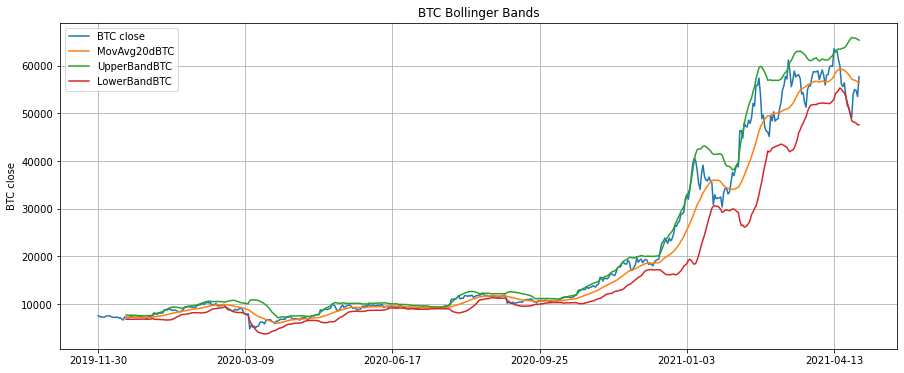

In [11]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandBTC"] = crypto_ohlc["MovAvg20dBTC"] + (crypto_ohlc["STDEV20dBTC"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandBTC"] = crypto_ohlc["MovAvg20dBTC"] - (crypto_ohlc["STDEV20dBTC"] * 2)

# Plotting
crypto_ohlc[['BTC close',"MovAvg20dBTC","UpperBandBTC","LowerBandBTC"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("BTC Bollinger Bands")
plt.axis("tight")
plt.ylabel("BTC close")

In [12]:
crypto_ohlc['BTChigher'] = np.where(crypto_ohlc["BTC close"]>crypto_ohlc["UpperBandBTC"],1,0)
crypto_ohlc['BTChigher'].value_counts()

0    470
1     48
Name: BTChigher, dtype: int64

In [13]:
crypto_ohlc['BTClower'] = np.where(crypto_ohlc["BTC close"]<crypto_ohlc["LowerBandBTC"],1,0)
crypto_ohlc['BTClower'].value_counts()

0    505
1     13
Name: BTClower, dtype: int64

Text(0, 0.5, 'ETH close')

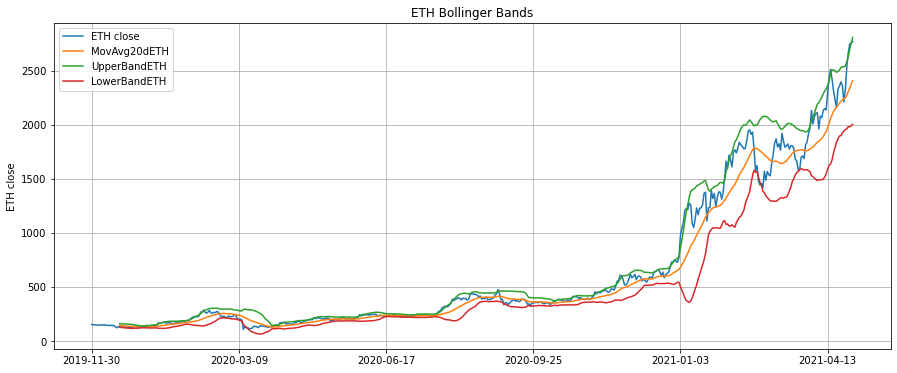

In [14]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandETH"] = crypto_ohlc["MovAvg20dETH"] + (crypto_ohlc["STDEV20dETH"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandETH"] = crypto_ohlc["MovAvg20dETH"] - (crypto_ohlc["STDEV20dETH"] * 2)

# Plotting
crypto_ohlc[['ETH close',"MovAvg20dETH","UpperBandETH","LowerBandETH"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("ETH Bollinger Bands")
plt.axis("tight")
plt.ylabel("ETH close")

In [15]:
crypto_ohlc['ETHhigher'] = np.where(crypto_ohlc["ETH close"]>crypto_ohlc["UpperBandETH"],1,0)
crypto_ohlc['ETHhigher'].value_counts()

0    462
1     56
Name: ETHhigher, dtype: int64

In [16]:
crypto_ohlc['ETHlower'] = np.where(crypto_ohlc["ETH close"]<crypto_ohlc["LowerBandETH"],1,0)
crypto_ohlc['ETHlower'].value_counts()

0    511
1      7
Name: ETHlower, dtype: int64

Text(0, 0.5, 'LTC close')

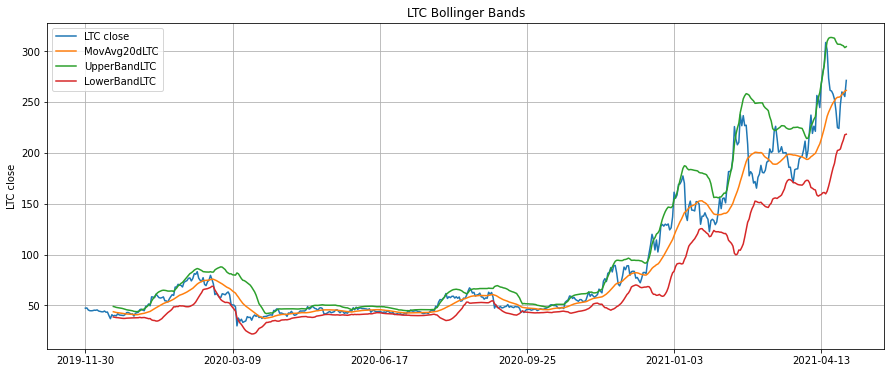

In [17]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandLTC"] = crypto_ohlc["MovAvg20dLTC"] + (crypto_ohlc["STDEV20dLTC"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandLTC"] = crypto_ohlc["MovAvg20dLTC"] - (crypto_ohlc["STDEV20dLTC"] * 2)

# Plotting
crypto_ohlc[['LTC close',"MovAvg20dLTC","UpperBandLTC","LowerBandLTC"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LTC Bollinger Bands")
plt.axis("tight")
plt.ylabel("LTC close")

In [18]:
crypto_ohlc['LTChigher'] = np.where(crypto_ohlc["LTC close"]>crypto_ohlc["UpperBandLTC"],1,0)
crypto_ohlc['LTChigher'].value_counts()

0    458
1     60
Name: LTChigher, dtype: int64

In [19]:
crypto_ohlc['LTClower'] = np.where(crypto_ohlc["LTC close"]<crypto_ohlc["LowerBandLTC"],1,0)
crypto_ohlc['LTClower'].value_counts()

0    508
1     10
Name: LTClower, dtype: int64

Text(0, 0.5, 'LINK close')

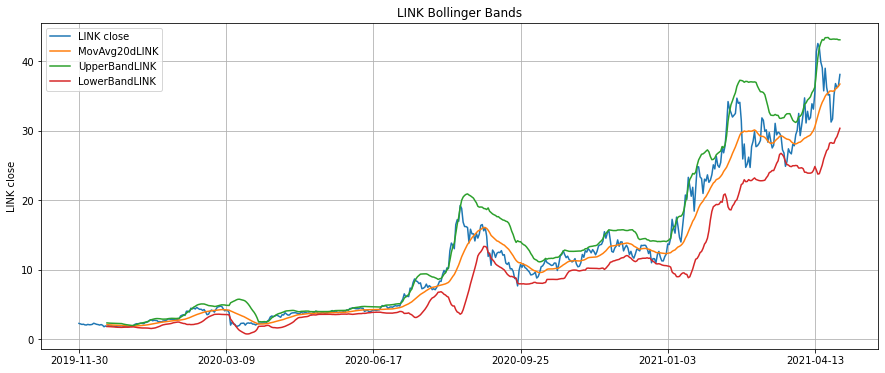

In [20]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandLINK"] = crypto_ohlc["MovAvg20dLINK"] + (crypto_ohlc["STDEV20dLINK"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandLINK"] = crypto_ohlc["MovAvg20dLINK"] - (crypto_ohlc["STDEV20dLINK"] * 2)

# Plotting
crypto_ohlc[['LINK close',"MovAvg20dLINK","UpperBandLINK","LowerBandLINK"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LINK Bollinger Bands")
plt.axis("tight")
plt.ylabel("LINK close")

In [21]:
crypto_ohlc['LINKhigher'] = np.where(crypto_ohlc["LINK close"]>crypto_ohlc["UpperBandLINK"],1,0)
crypto_ohlc['LINKhigher'].value_counts()

0    461
1     57
Name: LINKhigher, dtype: int64

In [22]:
crypto_ohlc['LINKlower'] = np.where(crypto_ohlc["DOGE close"]<crypto_ohlc["LowerBandLINK"],1,0)
crypto_ohlc['LINKlower'].value_counts()

1    499
0     19
Name: LINKlower, dtype: int64

Text(0, 0.5, 'DOGE close')

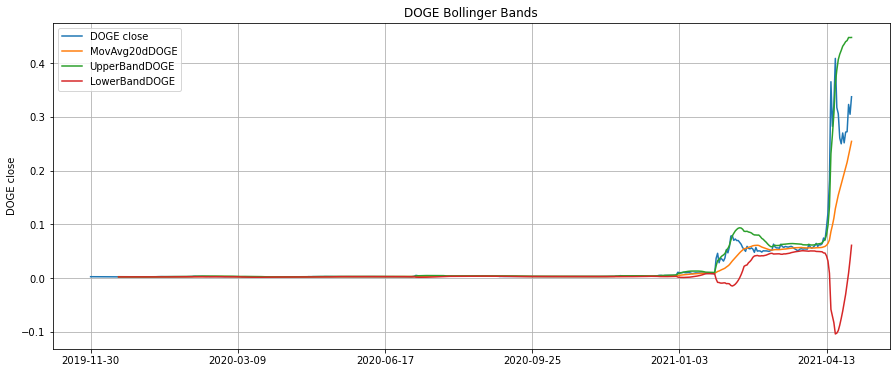

In [23]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandDOGE"] = crypto_ohlc["MovAvg20dDOGE"] + (crypto_ohlc["STDEV20dDOGE"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandDOGE"] = crypto_ohlc["MovAvg20dDOGE"] - (crypto_ohlc["STDEV20dDOGE"] * 2)

# Plotting
crypto_ohlc[['DOGE close',"MovAvg20dDOGE","UpperBandDOGE","LowerBandDOGE"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("DOGE Bollinger Bands")
plt.axis("tight")
plt.ylabel("DOGE close")

In [24]:
crypto_ohlc['DOGEhigher'] = np.where(crypto_ohlc["DOGE close"]>crypto_ohlc["UpperBandDOGE"],1,0)
crypto_ohlc['DOGEhigher'].value_counts()

0    461
1     57
Name: DOGEhigher, dtype: int64

In [25]:
crypto_ohlc['DOGElower'] = np.where(crypto_ohlc["DOGE close"]<crypto_ohlc["LowerBandDOGE"],1,0)
crypto_ohlc['DOGElower'].value_counts()

0    504
1     14
Name: DOGElower, dtype: int64